In [ ]:
# Libraries
import pandas as pd

In [ ]:
!pip install pandas matplotlib tensorflow

In [ ]:
# Read files
# from google.colab import files
# files.upload()

csv_file = 'IMDB Dataset.csv'

df = pd.read_csv(csv_file)

In [ ]:
df.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
display(df.dtypes)

review       object
sentiment    object
dtype: object

In [ ]:
# Split dataset into train, test
from sklearn.model_selection import train_test_split # X review text, y sentiment
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size = 0.30, random_state=0)

In [ ]:
# convert categorical sentiment labels to numerical (0 = positive, 1 = negative)
sentiment_label = y_train.factorize() 
sentiment_label

(array([0, 1, 0, ..., 0, 1, 0]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
# Retrieve text data from dataframe
reviews = X_train.values 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # tokenize reviews
tokenizer = Tokenizer(num_words=5000)
# creates an association between a word and number, stored  a dictionary in the tokenizer.word_index attribute
tokenizer.fit_on_texts(reviews) 

In [ ]:
# Replace words with their assigned number
encoded_docs = tokenizer.texts_to_sequences(reviews) 

In [ ]:
# Use padding to ensure each review is of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences 
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
# Building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=200)) # Embedding layer
model.add(SpatialDropout1D(0.25)) # Dropout mechanism to reduce overfitting
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5)) # LSTM layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) # Dense layer
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
__________________________________________________

In [ ]:
# Preprocess test data
test_sentiment_label = y_test.factorize()
test_sentiment_label
test_encoded_docs = tokenizer.texts_to_sequences(X_test) # replace words with their assigned number
test_padded_sequence = pad_sequences(test_encoded_docs, maxlen=200)

In [ ]:
history = model.fit(padded_sequence, sentiment_label[0], validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
875/875 [==============================] - 169s 187ms/step - loss: 0.4493 - accuracy: 0.7856 - val_loss: 0.3184 - val_accuracy: 0.8763
Epoch 2/5
875/875 [==============================] - 158s 180ms/step - loss: 0.3033 - accuracy: 0.8757 - val_loss: 0.2784 - val_accuracy: 0.8863
Epoch 3/5
875/875 [==============================] - 155s 178ms/step - loss: 0.2750 - accuracy: 0.8903 - val_loss: 0.3411 - val_accuracy: 0.8703
Epoch 4/5
875/875 [==============================] - 155s 177ms/step - loss: 0.2543 - accuracy: 0.8996 - val_loss: 0.2826 - val_accuracy: 0.8856
Epoch 5/5
875/875 [==============================] - 156s 178ms/step - loss: 0.2403 - accuracy: 0.9036 - val_loss: 0.3814 - val_accuracy: 0.8669


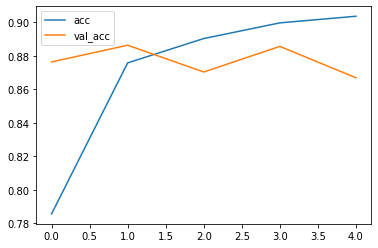

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visual analysis of accuracy metric
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

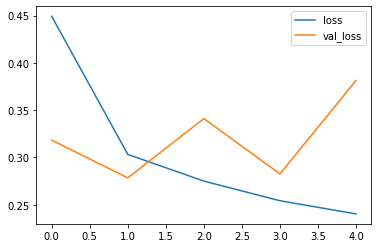

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visual analysis of loss metric
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [ ]:
# Evaluating the model using the test data
loss, accuracy = model.evaluate(test_padded_sequence, test_sentiment_label[0])

469/469 [==============================] - 25s 53ms/step - loss: 0.3885 - accuracy: 0.8655


In [ ]:
# Function that predicts the sentiment of a test sentence
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

test_sentence1 = "I enjoyed myself"
predict_sentiment(test_sentence1)
test_sentence2 = "This is the worst experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative
